In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import string
import nltk
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/missy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/missy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/missy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
os.chdir('..')

# Import NewsDataLoader and configuration
from src.loader import NewsDataLoader
from src.config import cfg

# Import utility functions
import src.utils as utils

data_loader = NewsDataLoader(cfg.path)
data_df = data_loader.get_news_data()
traffic_data = data_loader.get_traffic_data()
domains_df = data_loader.get_domain_location_data()


Namespace(output='news_output.csv', path='data', news='rating.csv', traffic='trafiic.csv', domain='domains_location.csv')
Output File: news_output.csv
Path: data
News Data: rating.csv
Traffic Data: trafiic.csv
Domain Location Data: domains_location.csv


In [3]:
print(data_df.columns)
print(traffic_data.columns)
print(domains_df.columns)

merged_df = pd.concat([data_df,traffic_data], axis=1)
print(merged_df.columns)
cleaned_df = merged_df.dropna()


Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')
Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')
Index(['SourceCommonName', 'location', 'Country'], dtype='object')
Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment', 'GlobalRank', 'TldRank',
       'Domain', 'TLD', 'RefSubNets', 'RefIPs', 'IDN_Domain', 'IDN_TLD',
       'PrevGlobalRank', 'PrevTldRank', 'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')


In [4]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

cleaned_df['processed_title'] = cleaned_df['title'].apply(preprocess_text)
cleaned_df['processed_content'] = cleaned_df['content'].apply(preprocess_text)
cleaned_df['combined_text'] = cleaned_df['processed_title'] + ' ' + cleaned_df['processed_content']    

/var/folders/14/f3j86z751wb6b5yyjr_10z0c0000gn/T/ipykernel_76281/1688965238.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['processed_title'] = cleaned_df['title'].apply(preprocess_text)
/var/folders/14/f3j86z751wb6b5yyjr_10z0c0000gn/T/ipykernel_76281/1688965238.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['processed_content'] = cleaned_df['content'].apply(preprocess_text)
/var/folders/14/f3j86z751wb6b5yyjr_10z0c0000gn/T/ipykernel_76281/1688965238.py:13: SettingWithCopyWa

In [6]:
categories = {
    'Breaking News',
    'Politics',
    'World News',
    'Business/Finance',
    'Technology',
    'Science',
    'Health',
    'Entertainment',
    'Sports',
    'Environment',
    'Crime',
    'Education',
    'Weather',
    'Other'
}

In [7]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_df['combined_text'])

# Define number of topics
num_topics = 10

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

LatentDirichletAllocation(random_state=42)

In [8]:
doc_topic_matrix = lda_model.transform(X)


In [9]:
def get_dominant_topic(topic_distribution):
    return np.argmax(topic_distribution)

topic_categories = {
    'Breaking News': [0, 1],
    'Politics': [2, 3],
    'World News': [4, 5],
    'Business/Finance': [6, 7],
    'Technology': [8, 9],
    'Science': [10,11], 
    'Health': [12,13], 
    'Entertainment': [14,15],  
    'Sports': [16,17], 
    'Environment': [18,19], 
    'Crime': [20,21],  
    'Education': [22,23],  
    'Weather': [24,25], 
    'Other': []  
}

In [10]:
def map_to_category(dominant_topic):
    if dominant_topic in range (0,2):
       return 'Breaking News'
    elif dominant_topic in range (2,4) :
       return 'Politics'
    elif dominant_topic in range (4,6):
       return 'World News'
    elif dominant_topic in range (6,8):
       return 'Business/Finance'
    elif dominant_topic in range (8,10):
       return 'Technology'
    elif dominant_topic in range (10,12):
       return 'Science'
    elif dominant_topic in range (12,14):
       return 'Health'
    elif dominant_topic in range (14,16):
       return 'Entertainment'
    elif dominant_topic in range (16,18):
       return 'Sports'
    elif dominant_topic in range (18,20):
       return 'Environment'
    elif dominant_topic in range (20,22):
       return 'Crime'
    elif dominant_topic in range (22,24):
       return 'Education'
    elif dominant_topic in range (24,26):
       return 'Weather'
    else:
        return 'Other'

In [11]:
dominant_topics = [get_dominant_topic(topic_dist) for topic_dist in doc_topic_matrix]
topic_categories = [map_to_category(topic) for topic in dominant_topics]
cleaned_df['topic_category'] = topic_categories

/var/folders/14/f3j86z751wb6b5yyjr_10z0c0000gn/T/ipykernel_76281/827325943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['topic_category'] = topic_categories


In [25]:
# Calculate the diversity of topics covered by each website
website_topic_diversity = cleaned_df.groupby('source_name')['topic_category'].nunique().reset_index()
website_topic_diversity.columns = ['source_name', 'topic_diversity']

# Find the website with the highest topic diversity
most_diverse_website = website_topic_diversity.loc[website_topic_diversity['topic_diversity'].idxmax()]
topic_trend = cleaned_df.groupby(['published_at', 'topic_category']).size().reset_index()
topic_trend.columns = ['published_at', 'topic_category', 'topic_count']
print(topic_trend.columns)
topic_trend = topic_trend.head(3000)
# Print the most diverse website
# print("Website with the highest topic diversity:", most_diverse_website['source_name'])
# print("Number of unique topics covered:", most_diverse_website['topic_diversity'])
# print("Top 10 website with diverse topics:", website_topic_diversity.head(10)) 

Index(['published_at', 'topic_category', 'topic_count'], dtype='object')


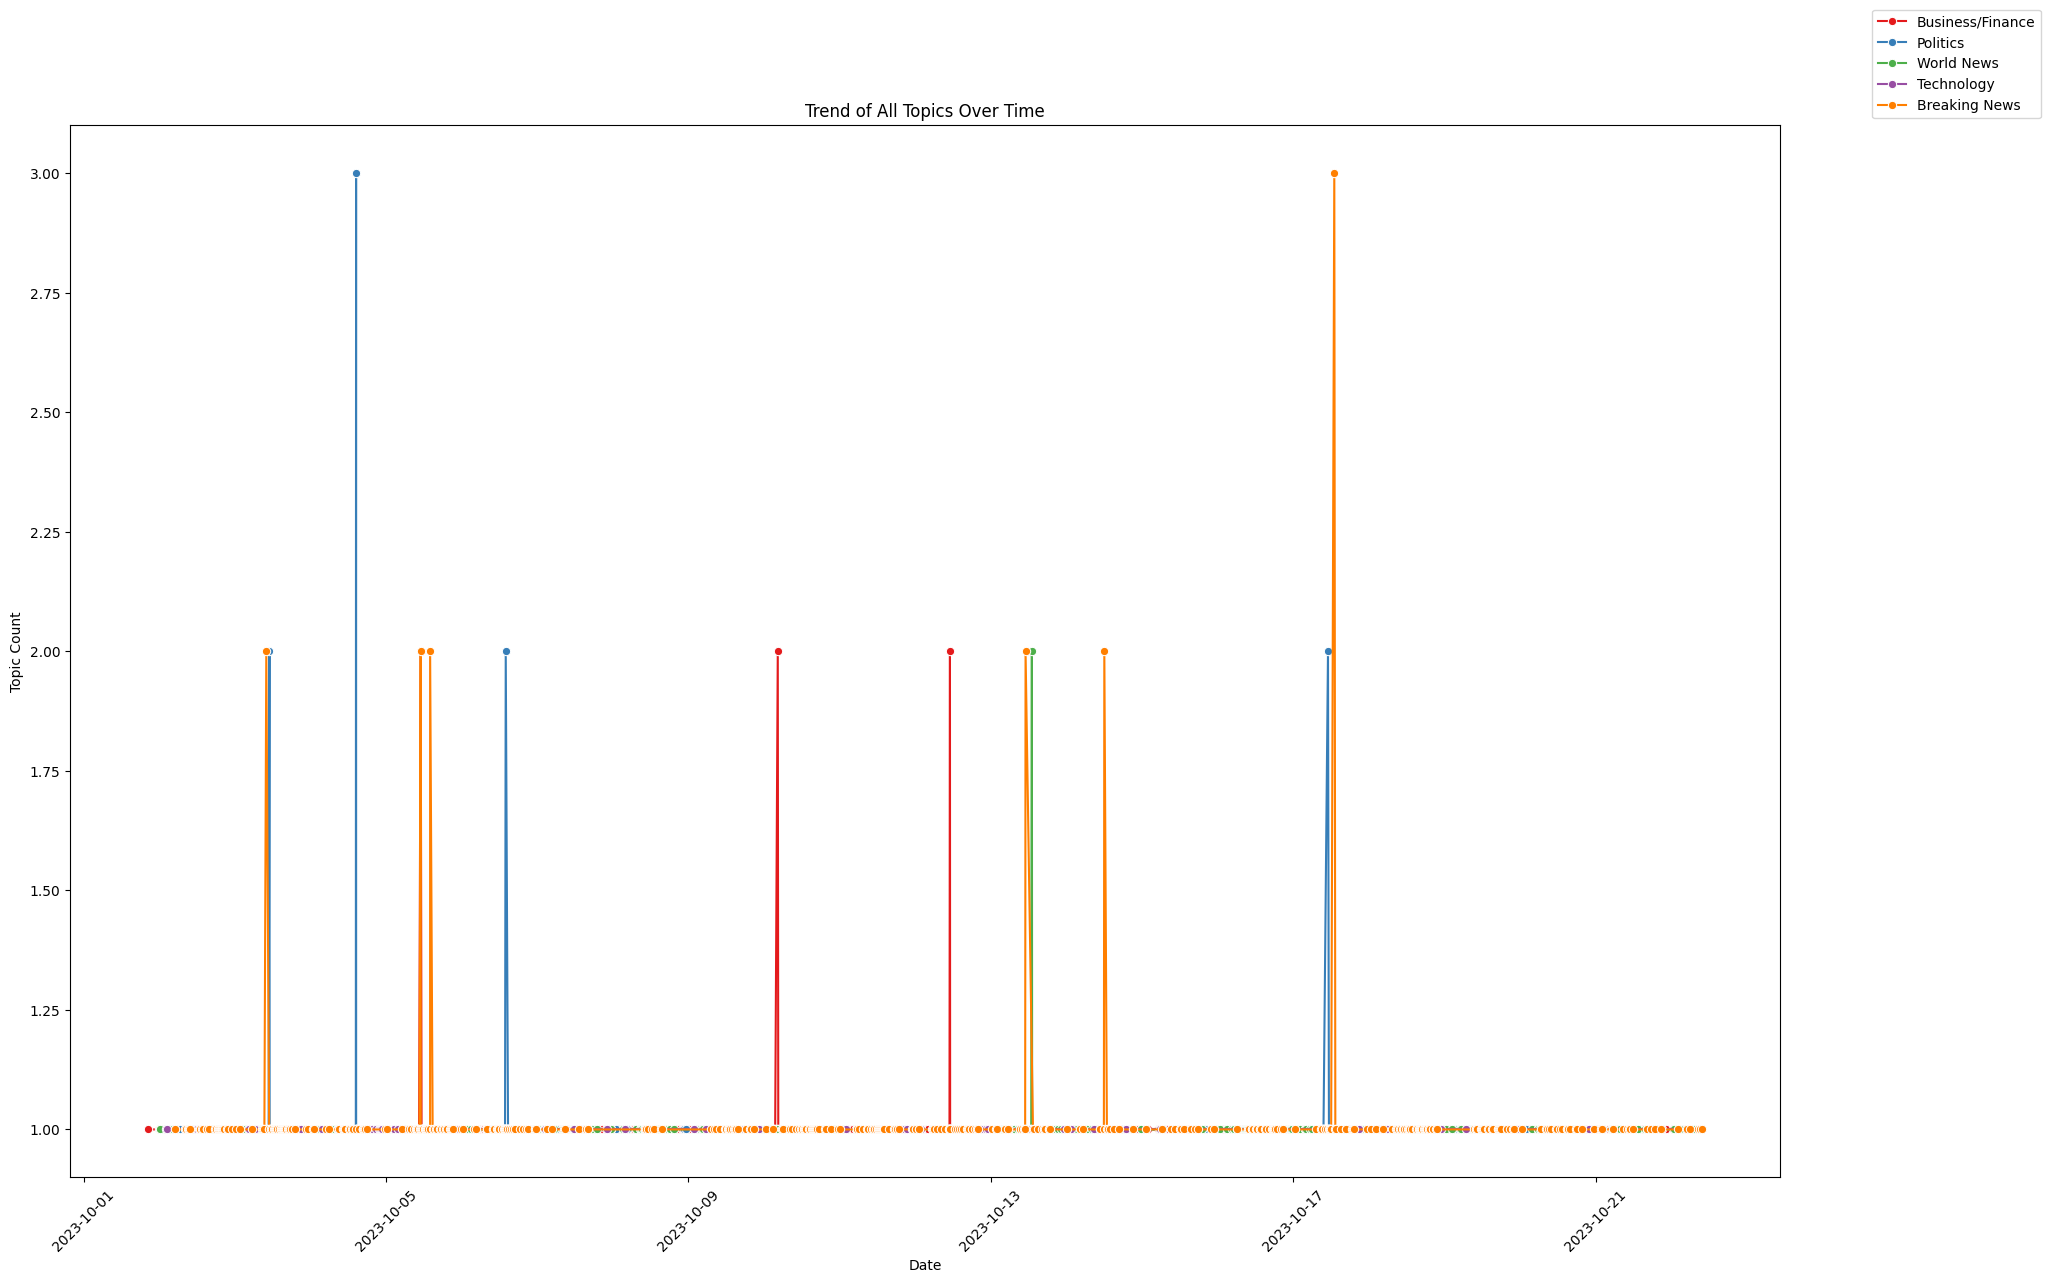

In [31]:
topic_trend['published_at'] = pd.to_datetime(topic_trend['published_at'])

plt.figure(figsize=(18, 12))  # Adjust the size of the plot
sns.lineplot(data=topic_trend, x='published_at', y='topic_count', hue='topic_category', palette='Set1', marker='o')  # Change the palette to 'Set1'
plt.xlabel('Date')
plt.ylabel('Topic Count')
plt.title('Trend of All Topics Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left')
plt.show()
